<a href="https://colab.research.google.com/github/soycoder/learning-data_viz/blob/master/Multi_Dimensional_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Effective Visualization of Multi-Dimensional Data — A Hands-on Approach**
### Strategies for Effective Data Visualization
Writer : Dipanjan (DJ) Sarkar

[Ref.](https://medium.com/swlh/effective-visualization-of-multi-dimensional-data-a-hands-on-approach-b48f36a56ee8)

In [4]:
import pandas as pd
import matplotlib as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [37]:
vg_sales = pd.read_csv('/content/vgsales.csv', sep=',')

# Filter Genre['Sports', 'Action']
isSports = vg_sales['Genre'] == 'Sports'
sports_vg_sales = vg_sales[isSports]

isAction = vg_sales['Genre'] == 'Action'
action_vg_sales = vg_sales[isAction]

#Show
print(sports_vg_sales.head())
print(action_vg_sales.head())


    Rank               Name Platform  ...  JP_Sales Other_Sales Global_Sales
0      1         Wii Sports      Wii  ...      3.77        8.46        82.74
3      4  Wii Sports Resort      Wii  ...      3.28        2.96        33.00
13    14            Wii Fit      Wii  ...      3.60        2.15        22.72
14    15       Wii Fit Plus      Wii  ...      2.53        1.79        22.00
77    78            FIFA 16      PS4  ...      0.06        1.26         8.49

[5 rows x 11 columns]
    Rank                           Name  ... Other_Sales  Global_Sales
16    17             Grand Theft Auto V  ...        4.14         21.40
17    18  Grand Theft Auto: San Andreas  ...       10.57         20.81
23    24             Grand Theft Auto V  ...        1.38         16.38
24    25    Grand Theft Auto: Vice City  ...        1.78         16.15
38    39           Grand Theft Auto III  ...        1.30         13.10

[5 rows x 11 columns]


In [38]:
# Get names of indexes for which column each Country Sales has value 0
country = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
print('Before: ',sports_vg_sales.shape)
for c in country:
  # print(c)
  # sports_vg_sales
  indexNames = sports_vg_sales[ sports_vg_sales[c] == 0 ].index
  sports_vg_sales.drop(indexNames , inplace=True)
  # action_vg_sales
  indexNames = action_vg_sales[ action_vg_sales[c] == 0 ].index
  action_vg_sales.drop(indexNames , inplace=True)

print('After: ',sports_vg_sales.shape)

Before:  (2346, 11)
After:  (217, 11)


In [44]:
subset_attributes = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales' ]
rsports_vg_sales = round(sports_vg_sales[subset_attributes].describe(),2)
raction_vg_sales = round(action_vg_sales[subset_attributes].describe(),2)

pd.concat([rsports_vg_sales,raction_vg_sales], axis=1, keys=['Genre : sports','Genre : action'])

Genre : sports                    ... Genre : action                         
            NA_Sales EU_Sales JP_Sales  ...       JP_Sales Other_Sales Global_Sales
count         217.00   217.00   217.00  ...         559.00      559.00       559.00
mean            1.01     0.95     0.28  ...           0.18        0.19         1.66
std             3.16     2.36     0.57  ...           0.33        0.54         2.32
min             0.01     0.01     0.01  ...           0.01        0.01         0.08
25%             0.13     0.14     0.02  ...           0.02        0.03         0.38
50%             0.35     0.32     0.06  ...           0.06        0.07         0.91
75%             0.93     0.89     0.25  ...           0.18        0.19         1.99
max            41.49    29.02     3.77  ...           3.96       10.57        21.40

[8 rows x 10 columns]

TypeError: ignored

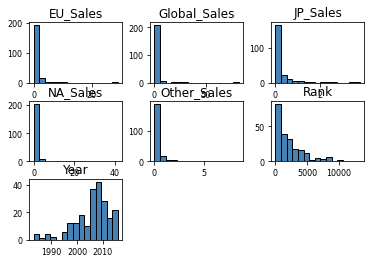

In [46]:
sports_vg_sales.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  